## Decision Tree - Classification

## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.




Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [3]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [4]:
10/344

# missing valueslar datamın %3'ne takabül ettiğinden drop ediyorum.

0.029069767441860465

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [7]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [8]:
for i, feature in enumerate(df.select_dtypes("object").columns):
   print(f"{i}.{feature}: {df[feature].unique()}")
        
# object featurların unique kategorik gözlemlerini listeliyoruz. Sex'te "." olarak yanlış bir kategorik veri var. Bundan
# kurtulmamız gerekiyor.

0.species: ['Adelie' 'Chinstrap' 'Gentoo']
1.island: ['Torgersen' 'Biscoe' 'Dream']
2.sex: ['MALE' 'FEMALE' '.']


In [9]:
display(df[df["sex"]== "."])

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [10]:
ind = df[df["sex"]== "."].index
df.drop(index=ind, inplace=True)

# sex featurandaki yanlış kategorik veriyi drop ediyoruz.

In [11]:
df.sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

In [12]:
df2 = df.copy()

## Visualization

In [13]:
df["species"].value_counts(normalize=True)

species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: proportion, dtype: float64

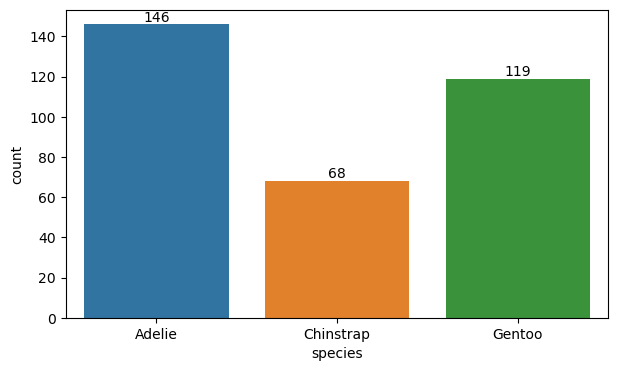

In [14]:
ax = sns.countplot(x="species", data = df)
ax.bar_label(ax.containers[0]);

# Datamda bir inbalanced durumu söz konusu ancak dataya bir inbalanced muamelesinde bulunup bulunmayacağımıza scorları gördükten
# sonra karar vereceğiz.

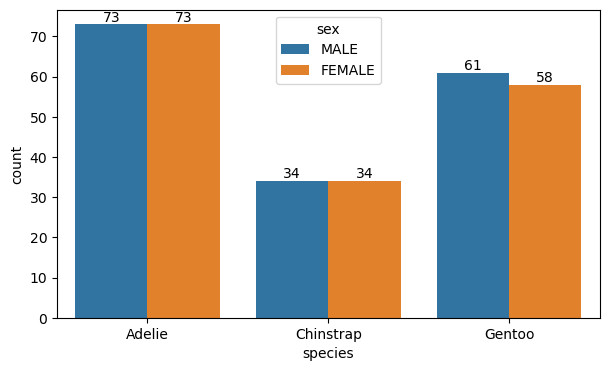

In [15]:
ax = sns.countplot(x="species", hue="sex", data = df)
for p in ax.containers:
    ax.bar_label(p)

# cinsiyetlere göre dağılımı

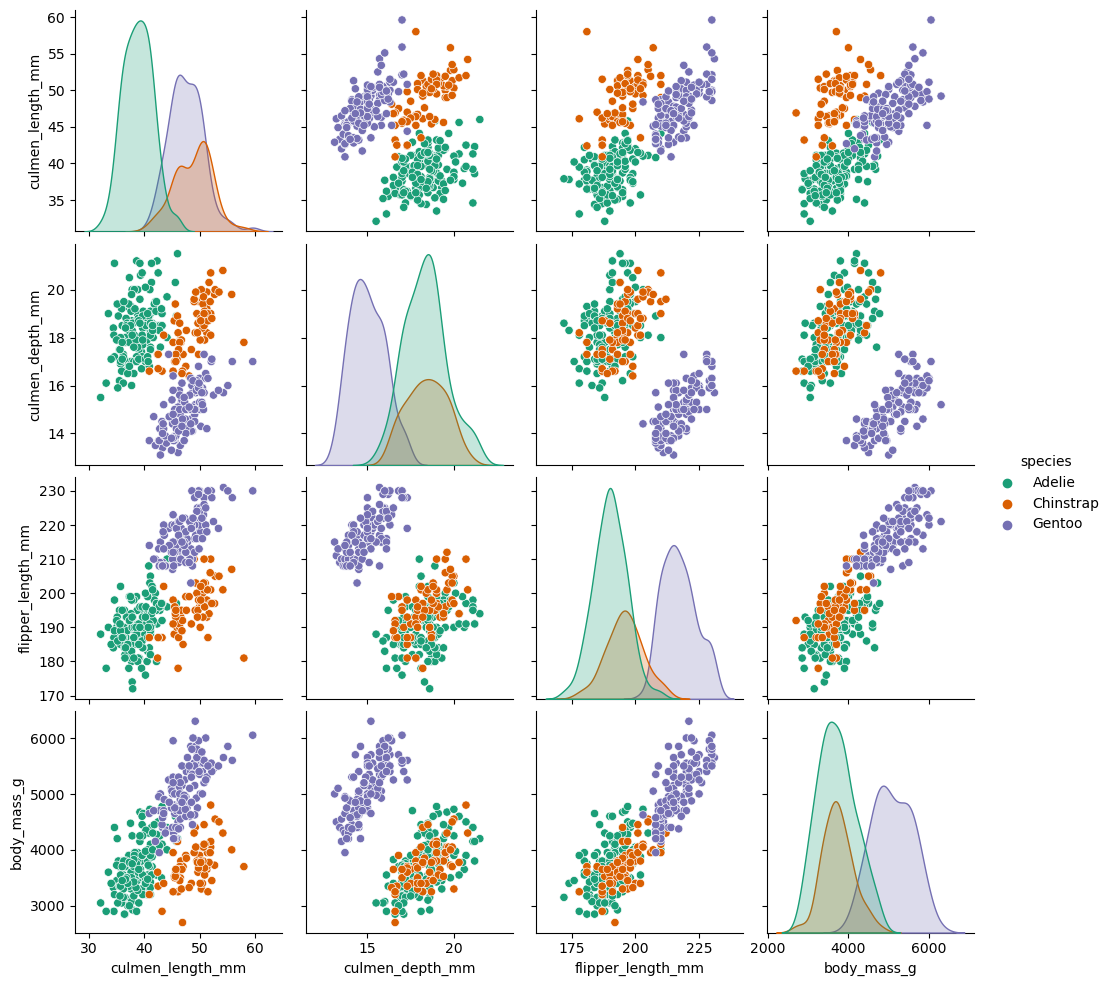

In [16]:
sns.pairplot(df,hue='species',palette='Dark2') #height=2, aspect=1

# Burda herbir featuran ne kadar ayırt edici özellikte olduğunu görmekle birlikte labelların hangi featurlar özelinde
# nasıl ayrıştıklarını da görebiliyoruz.

In [17]:
df2.select_dtypes("number").head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


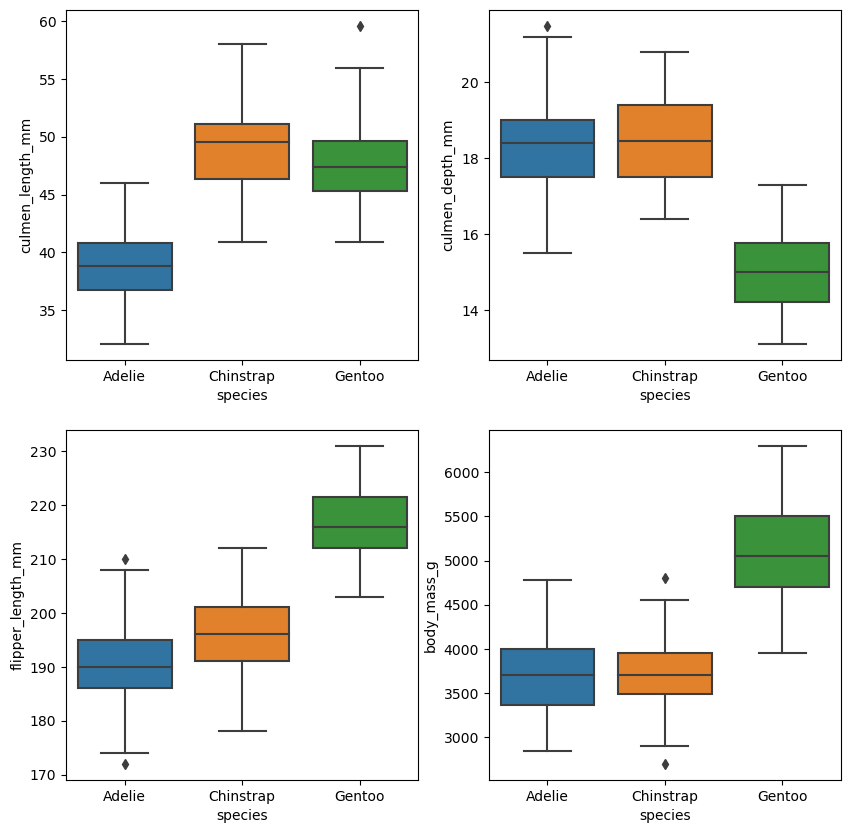

In [18]:
index = 0
plt.figure(figsize=(10,10))
for feature in df.select_dtypes("number"):
    if feature != "species":
        index += 1
        plt.subplot(2,2,index)
        sns.boxplot(x='species',y=feature,data=df)
        
# pair plotdan aldığımız insgtları burdan da alabiliyoruz.

In [121]:
# !pip install plotly

In [116]:
import plotly.express as px

In [117]:
fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();

# 3 boyutlu olarak baktığımızda labelların birbirinden iyi ayrıştıklarını görebiliyoruz.

## Correlation beetwen numeric features

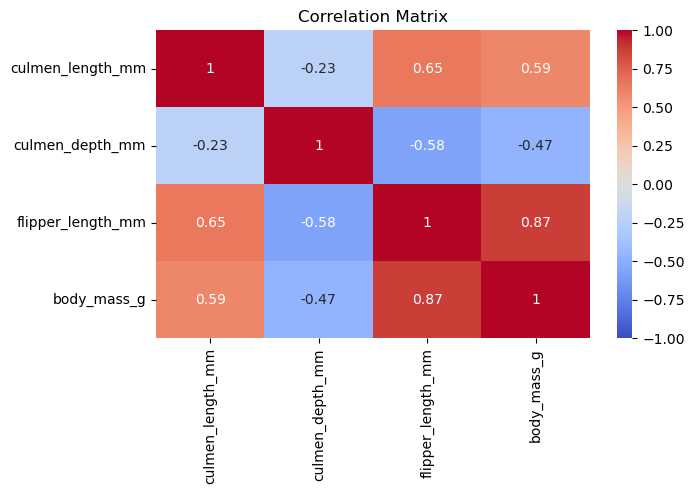

In [21]:
sns.heatmap(df.select_dtypes("number").corr(),annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title("Correlation Matrix")

plt.show()

# tree based modeller non-parametric(katsayıları olmayan) modellerden olduklarından multicolonarty problem değildir. 

## Train | Test Split

In [22]:
X = df.drop(columns="species")
y = df['species']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

## OrdinalEncoder and Categoric Variable

https://bookdown.org/max/FES/categorical-trees.html

https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

In [24]:
# Tree based modellerle ilgili yapılan akademik bir çalışmada;
# 1. Ordinal encoder scorlarının one hot encoder scorlarına göre ortalama %1, %2 civarlarında daha iyi olduğu,
# 2. eğitim esnasında ordinal encoderın, one hot encodera göre 2,5 kat daha hızlı çalıştığı,
# 3. Doğru feature importance elde edebilmek için Ordinal encoder kullanılması gerektiği görülmüştür.

# Tree based modellerde amacımız sadece skor almak ise hem one hot encoder hem de ordinal encoder kullanabiliriz. 
# Ancak, yukarıda bahsettiğimiz avantajlarından dolayı tree based modellerde ordinal encoder kullanacağız.

# Eğer amacınız sadece skor almaksa ordinal encoder veya one hot encoder kullanabileceğimiz söylemiştik. Ancak kesinlikle
# get_dummies fonksiyonunu kullanarak gözlemleri dummies featurlara (one hot encoder) dönüştürmüyoruz. Çünkü get_dummies 
# fonksiyonu data leakage sorununa yol açar. get_dummies yerine her zaman one hot encoder kullanmamız gerektiğini unutmuyoruz.

In [25]:
cat = X_train.select_dtypes("object").columns
cat

# Dönüşümleri train datasındaki unique kategorik verilere göre yapacağımızdan öncelikle train datasındaki kategorik featurları
# tespit ediyoruz.

Index(['island', 'sex'], dtype='object')

## Modeling with Pipeline

In [26]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

# İşlemlerimizi otomatize etmek için one hot encoderda olduğu gibi make_column_transformer ve pipeline kullanacağız.
# Ordinal encoder algortiması içerisinde handle_unknown parametresi default olarak "error"dür. Eğer bunu errorde bırakırsak
# train datasında olmayıp test datasında olan bir kategorik veri ile karşılaşıldığında algoritma hata döndürür. Ancak
# handle_unknown='use_encoded_value' ve unknown_value=-1 olarak ayarlanırsa train datasında olmayıp test datasında olan bir 
# kategorik veriye -1 değeri atanır. unknown_value=-1 olarak atama sebebimiz, diğer kategorik verilere verilecek aynı numaranın
# verilmeyeceğinden emin olmaktır.

# make_column_transformer((ord_enc, cat), remainder='passthrough') fonksiyonu cat değişkenine tanımladığımız kategorik
# featurları yukarıda bahsettiğimiz şekilde önce numeric verilere dönüştürecek, remainder="passthrough" parametresi ile
# numeric featurara hiçbir işlem yapmayacak olduğu gibi bırakacak.

# make_column_transformer fonksiyonu datanın yapısını değiştiriyor. Categorik feturelar df içerinde ilk featurlar olacak 
# şekilde numeric featurlar ise onları takip edecek şekilde yeniden sıralanır.

In [27]:
pd.DataFrame(column_trans.fit_transform(X_train))

# make_column_transformer fonksiyonunun df featurlarını gördüğünüz gibi ilk featurlar kategorik sonraki featurlar numeric
# olacak şekilde yeniden sıraladı.

,0,1,2,3,4,5
0,0.0,1.0,49.8,16.8,230.0,5700.0
1,1.0,1.0,54.2,20.8,201.0,4300.0
2,1.0,0.0,45.6,19.4,194.0,3525.0
3,1.0,0.0,46.2,17.5,187.0,3650.0
4,1.0,0.0,38.1,17.6,187.0,3425.0
...,...,...,...,...,...,...
261,0.0,0.0,38.1,17.0,181.0,3175.0
262,2.0,0.0,39.5,17.4,186.0,3800.0
263,0.0,1.0,42.0,19.5,200.0,4050.0
264,0.0,1.0,41.1,19.1,188.0,4100.0


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# fit işlemi ile train datasının önce kategorik featurları tespit edilip bu featurlar içerisindeki unique kategorik veriler 
# numeric verilere dönüştürülüyor ve ilgili modele gönderilerek eğitim yapılıyor.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model', DecisionTreeClassifier(random_state=101))])

## Model Performance on Classification Tasks

In [30]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [31]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# predict işlemi test datasını train datasındaki unique kategorik verilere göre transforma tabi tutarak numeric verilere 
# dönüştürüyor.

# pipeline içerisinde make_column_transform olduğundan df yapısı train datasında olduğu gibi değiştiriliyor ve predict edilmek 
# üzere ilgili modele gönderiliyor

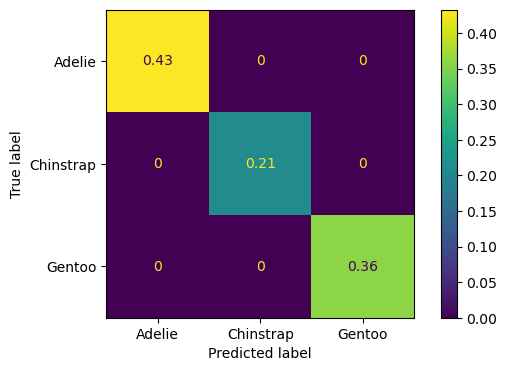

In [32]:
ConfusionMatrixDisplay.from_estimator(pipe_model,X_test, y_test,normalize='all')

In [33]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# datamız inbalanced olmasına rağmen skorlarımız  birbirine yakın 
# çıktığından dataya herhangi bir imbalanced muamalesinde bulunmayacağız.

Test_Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Train_Set
[[117   0   0]
 [  0  54   0]
 [  0   0  95]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        95

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



## Cross Validate

In [34]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score,\
                            precision_score

In [35]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]
model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.970085
train_accuracy           1.000000
test_precision_micro     0.970085
train_precision_micro    1.000000
test_recall_micro        0.970085
train_recall_micro       1.000000
test_f1_micro            0.970085
train_f1_micro           1.000000
dtype: float64

In [57]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

## Evaluating ROC Curves and AUC

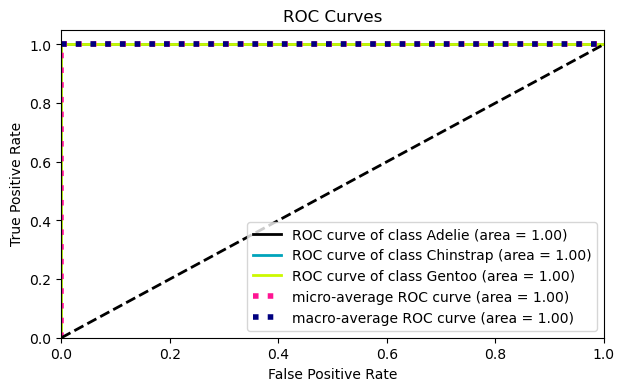

In [58]:
from scikitplot.metrics import plot_roc, precision_recall_curve

operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]
model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

## Feature İmportances with Pipeline

https://github.com/scikit-learn/scikit-learn/issues/21304

In [41]:
cat

Index(['island', 'sex'], dtype='object')

In [42]:
pipe_model["DT_model"].feature_importances_ # DT_model.feature_importances_


# pipeline kullandığımızdan pipe_model["DT_model"] ile pipeline içerisinden önce ML modelimizi çekip sonra feature_importance_
# kodu ile toplamları 1 olacak şekilde tüm featurlara %'sel olarak oranlar tanımlanıyor. En yüksek orana sahip feature
# en önemli feature olurken en düşük orana sahip feature ise en önemsiz feature oluyor.


# pipe_model içerisinde kullanılan make_column_transformer fonksiyonu df'deki featurların sıralamasını değiştirdiğinden dolayı
# aşağıda ilk 2 oran categorik featurlara aitken sonraki oranlar numeric featurlara aittir.

# Eğer pipeline içerisinde make_column_transformer kullanılmamış olsaydı df'in feature sıralaması değişmeyecekti. Sıralamanın 
# sadece make_column_transformer fonksiyonu kullanıldığında değiştiğini UNUTMAYALIM.

# feature importance modelden en iyi skorları aldıktan sonra yapılır. Bu data özelinde DT modelinin default hyper 
# parametreleriyle çok yüksek skorlar alabildiğimden gridsearch yapmadan feature importance yaptık. Ancak, gridsearch sonrası
# bulduğumuz en iyi hyper_paramtreler üzerinden feature importance yapmamız gerektiğini unutmuyoruz.

array([0.03656706, 0.03209286, 0.34416147, 0.06879777, 0.51248624,
       0.00589461])

In [43]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

# pipe_model'den aldığımız yeni feature sıralaması aşağıda olduğu gibidir. Fonksiyon ordinalencoder dönüşümü yaptığı kategoric 
# featurların başına ordinalencoder__ ön ekini ilave ederken numaric featurların başına remainder__ ön ekini atamış. Ama 
# featurelara ait feature importance oranlarını tanımlarken feature isimlerinin daha kolay anlaşılabilir olması maksadıyla 
# aşağıda bu ön eklerden kurtulacağız.

array(['ordinalencoder__island', 'ordinalencoder__sex',
       'remainder__culmen_length_mm', 'remainder__culmen_depth_mm',
       'remainder__flipper_length_mm', 'remainder__body_mass_g'],
      dtype=object)

In [44]:
X_train.head(1)

# Normalde datayı pipeline verdiğimiz df'in feature sıralaması aşağıda olduğu gibiydi.

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
285,Biscoe,49.8,16.8,230.0,5700.0,MALE


In [45]:
pd.DataFrame(pipe_model["OrdinalEncoder"].fit_transform(X_train), columns=features).head()

# pipe_model içerisinden ordinalencoder dönüşümü yapan make_column_transformer fonksiyonunu pipe_model["OrdinalEncoder"] ile
# çekebiliyoruz. Daha sonra fonksiyonu kullanarak train datasına yapılan değişimi aşağıda gözlemleyebiliyoruz.
# Gördüğünüz gibi ilk sırada kategorik, sonrasında numeric featurelar var.

# hem eğitimm hemde predict aşamasında data modele aşağıdaki df yapısında veriliyor.

,ordinalencoder__island,ordinalencoder__sex,remainder__culmen_length_mm,remainder__culmen_depth_mm,remainder__flipper_length_mm,remainder__body_mass_g
0,0.0,1.0,49.8,16.8,230.0,5700.0
1,1.0,1.0,54.2,20.8,201.0,4300.0
2,1.0,0.0,45.6,19.4,194.0,3525.0
3,1.0,0.0,46.2,17.5,187.0,3650.0
4,1.0,0.0,38.1,17.6,187.0,3425.0


In [47]:
new_features = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
new_features

# featurların başındaki ön eklerden kurtuluyoruz. ve liste içerisinde sıralandırıyoruz ve bu sıralamayı new_features değişkenine
# atıyoruz. Feature importance sıralamasında bu feature sıralamasını kullanacağız.

['island',
 'sex',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

In [48]:
df_f_i = pd.DataFrame(data=pipe_model["DT_model"].feature_importances_, 
                      index=new_features, #index=X.columns
                      columns=["Feature Importance"])

df_f_i = df_f_i.sort_values("Feature Importance", ascending=False)

df_f_i

# feature importance oranlarını gösteren df'i df_f_i olarak tanımladık. Df içerisine pipe_model["DT_model"].feature_importances_
# ile feature importance oranlarını, make_column_transform sonrası sıralaması değişen feature isimleri (new_features) index'e
# tanımlıyoruz. Sonra da feature importance değerlerini  büyükten küçüğe doğru sıralıyoruz.

,Feature Importance
flipper_length_mm,0.512486
culmen_length_mm,0.344161
culmen_depth_mm,0.068798
island,0.036567
sex,0.032093
body_mass_g,0.005895


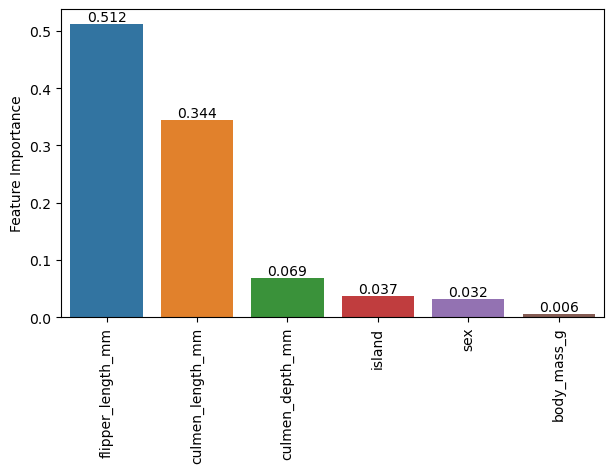

In [49]:
ax = sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 90)
plt.show();

# feature importance değerlerini barplot ile görselleştiriyoruz. Feature selection yaparken burdaki sıralamaya göre yapıyoruz.

## Drop most important feature

In [147]:
X.head(2)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


In [52]:
X2 = X.drop(columns = ["flipper_length_mm"]) 

# en öenmli feature drop edip X2 değişkenine atıyoruz.

In [53]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101)

# train ve test datalrını X2 datası üzerinden yapıyoruz. 

In [54]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

pipe_model2 = Pipeline(steps=operations)

pipe_model2.fit(X_train2, y_train2)

# yukarıda yaptığımız işlemleri tekrar ediyoruz.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model', DecisionTreeClassifier(random_state=101))])

In [55]:
eval_metric(pipe_model2, X_train2, y_train2, X_test2, y_test2)

# test datasındaki 3 hatamız 1'ü düştü ve test ile train datasının skorları biribirine daha da yaklaştı.

Test_Set
[[30  1  0]
 [ 0 16  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.94      1.00      0.97        16
      Gentoo       1.00      1.00      1.00        20

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


Train_Set
[[115   0   0]
 [  0  52   0]
 [  0   0  99]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       115
   Chinstrap       1.00      1.00      1.00        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



In [56]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# en önemli feature ile CV sonrası 0.973789 scorlarını alırken şuan CV'den 0.985185 scorlarını alıyoruz.
# Gördüğünüz gibi CV'deki validation ve train dataları arasındaki variance da kapnamış.

test_accuracy            0.985185
train_accuracy           1.000000
test_precision_micro     0.985185
train_precision_micro    1.000000
test_recall_micro        0.985185
train_recall_micro       1.000000
test_f1_micro            0.985185
train_f1_micro           1.000000
dtype: float64

## Adelie-Chinstrap weighted metric Scores

In [59]:
from sklearn.metrics import make_scorer

In [60]:
scoring = {'precision-Adelie-Chinstrap': make_scorer(precision_score,  average="weighted", labels=["Adelie", "Chinstrap"]),
           'recall-Adelie-Chinstrap': make_scorer(recall_score, average="weighted", labels =["Adelie", "Chinstrap"]),
           'f1-Adelie-Chinstrap': make_scorer(f1_score, average="weighted", labels = ["Adelie", "Chinstrap"])
          }

# make_scorer fonksiyonu ile "Adelie", "Chinstrap" classlarının ağırlıklandırılmış precision, recall ve f1_scorlarona bakıyoruz

In [61]:
operations = [("OrdinalEncoder", column_trans), 
              ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train2, 
                        y_train2, 
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision-Adelie-Chinstrap     0.981303
train_precision-Adelie-Chinstrap    1.000000
test_recall-Adelie-Chinstrap        0.982353
train_recall-Adelie-Chinstrap       1.000000
test_f1-Adelie-Chinstrap            0.979985
train_f1-Adelie-Chinstrap           1.000000
dtype: float64

## Visualize the Tree

In [62]:
from sklearn.tree import plot_tree

# DT hyper_parametrelerini daha iyi anlayabilmek maksadıyla ağaçları görselleşticeğiz.

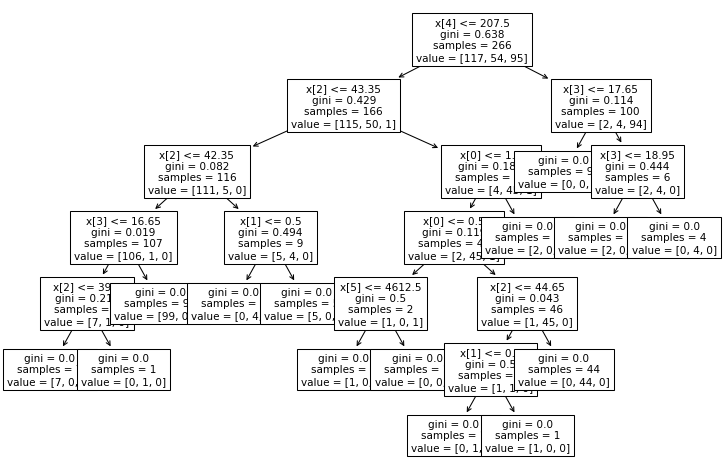

In [66]:
plt.figure(figsize=(12,8), dpi=75)
plot_tree(pipe_model["DT_model"], fontsize=10);

# plot_tree içerisine modeli verdiğimizde yaprak bölünmelerinin hangi featurların hangi değer aralıklarında gerçekleştiğini 
# bize gösteriyor. Görselin daha iyi anlaşılabilmesi için feature isimlerini ve class isimlerini de tanımlamamız gerekiyor

In [67]:
X.columns

Index(['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [68]:
new_features

# tree plot içerisinde pipe_model kullandığımızdan features names olarak yeni feature sıralaması kullanmamız gerektiğini
# unutmuyoruz.

['island',
 'sex',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

In [69]:
pd.set_option('display.max_rows', 500)
X_train.flipper_length_mm.sort_values().unique()

array([172., 174., 176., 178., 180., 181., 182., 183., 184., 185., 186.,
       187., 188., 189., 190., 191., 192., 193., 194., 195., 196., 197.,
       198., 199., 200., 201., 202., 203., 205., 206., 207., 208., 209.,
       210., 211., 212., 213., 214., 215., 216., 217., 218., 219., 220.,
       221., 222., 223., 224., 225., 226., 228., 229., 230., 231.])

In [70]:
y.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

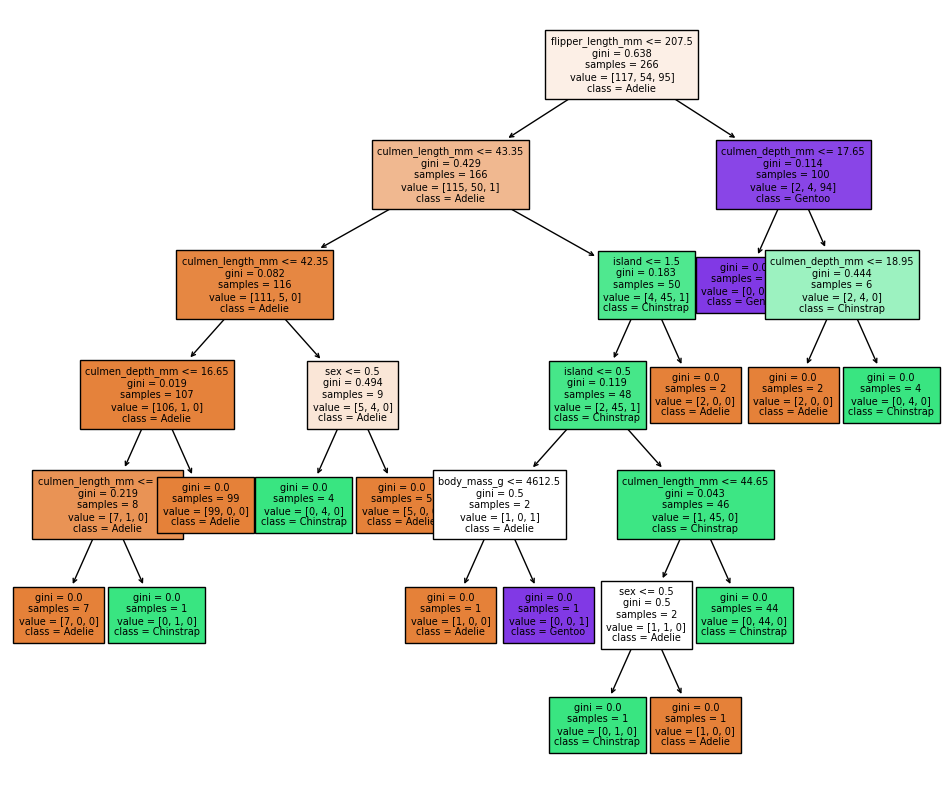

In [162]:
plt.figure(figsize=(12,10),dpi=100)
plot_tree(pipe_model["DT_model"], 
          filled=True, 
          feature_names=new_features, 
          class_names=y.unique(), 
          fontsize=7);

# features_names ve class isimlerini tanımlayarak görseli daha okunaklı hale getirdik. 
# pipe_model kullandığımızdan features names'in yeni feature sıralamasına göre olduğunu unutmuyoruz.

# gini değeri ne kadar düşükse o yaprakta benzer classa ait birçok gözlemin olduğunu gösterir.
# gini 0 ise o yapraktaki tüm gözlemler aynı classa ait olduğu gösterir.
# bir yapraktaki max gini değeri 1-1/n (n=class sayısı) olabilir. Bu datamız için max değer 1-1/3=0.67 olabilir.
# max gini değeri her classtan bol miktarda gözlem olduğunu gösterir.

# DT modelinde yaprakların bölünme şartı (splitter) default olarak en iyi (best) feature göre yapıldığından bu görselde 
# ilk yaprak modelin tahminlemeye en fazla katkısı olan flipper_length_mm feature üzerinden gerçekleşiyor.
# ilk yapraktaki samples train datasındaki toplam gözlem sayısını, value ise classların alfabetik/numeric sırasına göre hangi 
# classtan kaç gözlem olduğunu gösterir.

# Diğer yapraklardaki samples sayıları bölünme sonrasın da o yaprağa kaç gözlemin düştüğünü, value  ise hangi classtan kaç 
# gözlem olduğunu gösterir.

# class ise o yaprağa düşen gözlemleri modelin hangi class'a atayacağını gösterir.

## Understanding Hyperparameters

### Max depth

In [71]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["DT_model"], filled=True, feature_names=new_features, class_names = y.unique(), fontsize=10);
    #feature_names=X.columns

# report_model fonksiyonu ile test ve train datası scorlarını karşılaştırıp sonrada DT hyper parametlerinin ağaçlarda nasıl
# değişiklikler yaptığı gözlemleyebilmek için ağaçları görselleştireceğiz.

In [72]:
DT_model = DecisionTreeClassifier(max_depth=3, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

pruned_tree = Pipeline(steps=operations) #pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101)
pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(max_depth=3, random_state=101))])



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  1 23]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[115   2   0]
 [  5  49   0]
 [  0   1  94]]


              precision    recall  f1-score   support

      Adelie       0.96      0.98      0.97       117
   Chinstrap       0.94      0.91      0.92        54
      Gentoo       1.00      0.99      0.99        95

    accuracy                           0.97       266
   macro avg       0.97      0.96      0.96       266
weighted avg       0.97      0.97      0.97       266



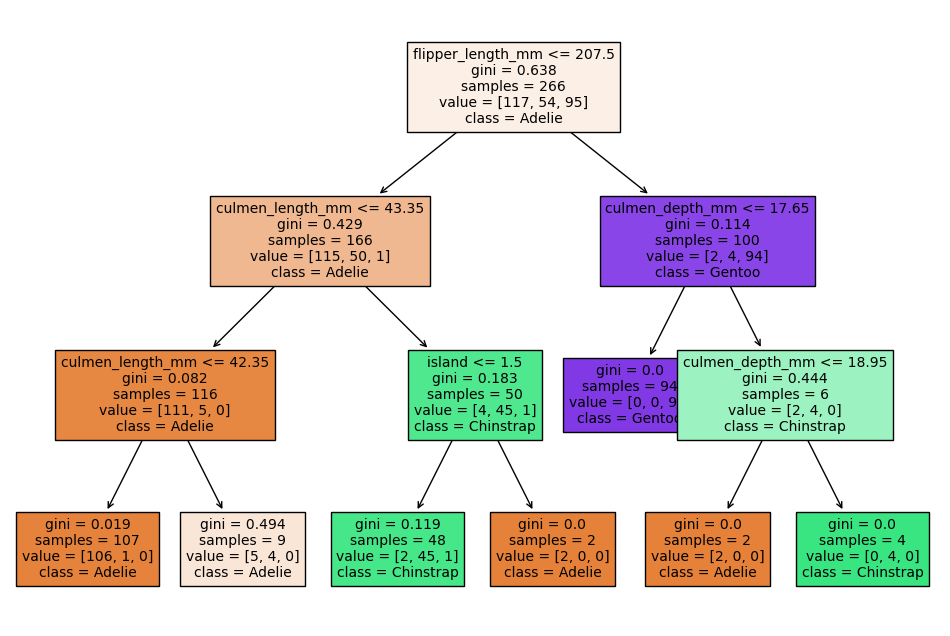

In [74]:
report_model(pruned_tree)

# max_depth bölünmenin ne kadar derine ineceğini gösterir.

# Overfitingi engellemek için kullanılan en önemli parametre max_depth dir.

# max_depth default None'dır yani tüm yapraklar pure olana kadar(gini/entropy 0 olması) dallanmaya devam eder. 

### min samples split



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 1  0 23]]


              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[115   2   0]
 [  6  48   0]
 [  1   0  94]]


              precision    recall  f1-score   support

      Adelie       0.94      0.98      0.96       117
   Chinstrap       0.96      0.89      0.92        54
      Gentoo       1.00      0.99      0.99        95

    accuracy                           0.97       266
   macro avg       0.97      0.95      0.96       266
weighted avg       0.97      0.97      0.97       266



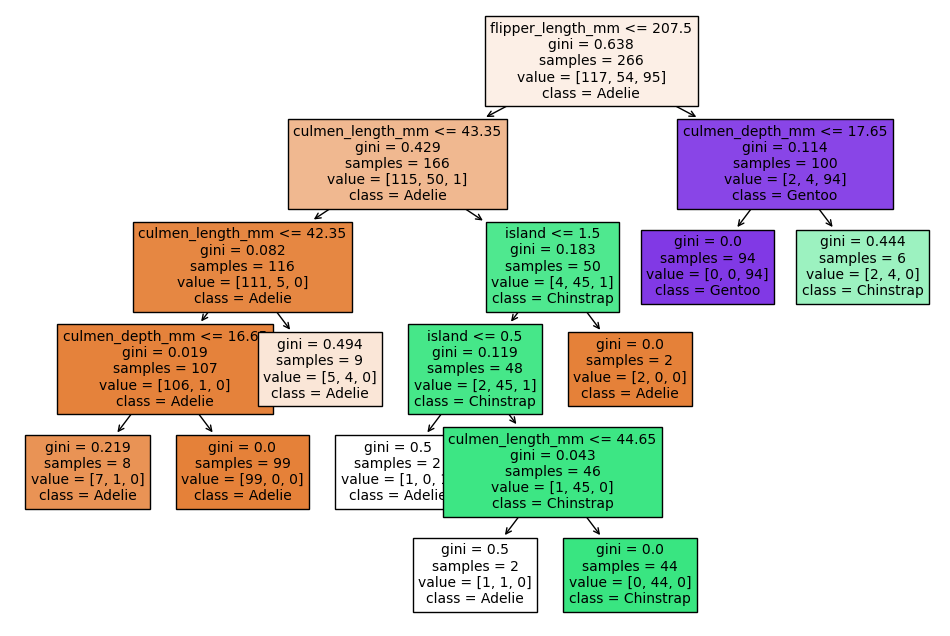

In [75]:
DT_model = DecisionTreeClassifier(min_samples_split=10, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

pruned_tree = Pipeline(steps=operations) #pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101)
pruned_tree.fit(X_train,y_train)

report_model(pruned_tree)

# min samples split bir yaprağın bölünmeye devam edebilmesi için o yaprakta bulunması gereken minimum gözlem sayısını gösterir.
# default değeri 2'dir.

### min samples leaf



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  1 23]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[111   4   2]
 [  5  45   4]
 [  0   1  94]]


              precision    recall  f1-score   support

      Adelie       0.96      0.95      0.95       117
   Chinstrap       0.90      0.83      0.87        54
      Gentoo       0.94      0.99      0.96        95

    accuracy                           0.94       266
   macro avg       0.93      0.92      0.93       266
weighted avg       0.94      0.94      0.94       266



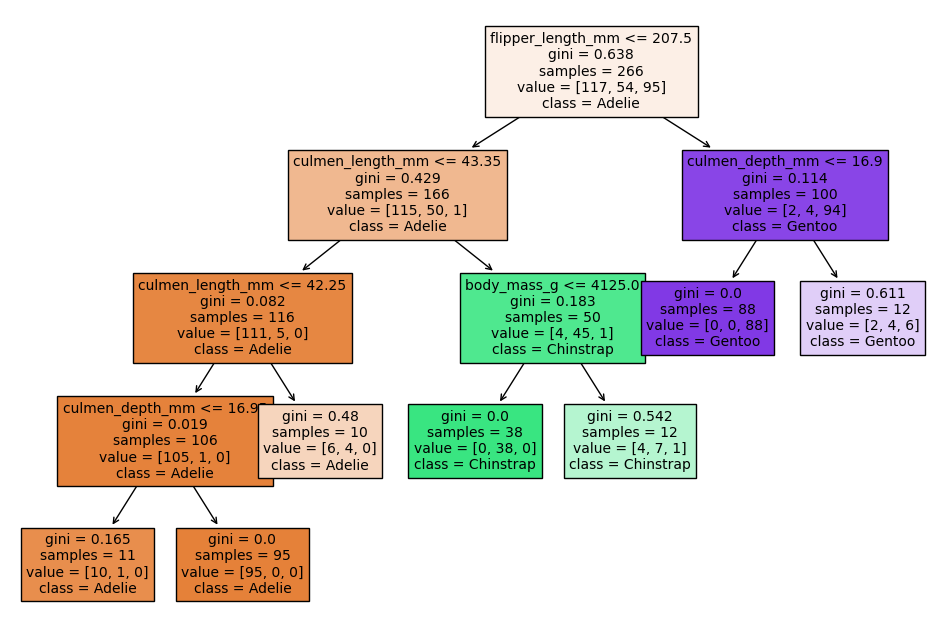

In [76]:
DT_model = DecisionTreeClassifier(min_samples_leaf=10, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

pruned_tree = Pipeline(steps=operations) #pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101)
pruned_tree.fit(X_train,y_train)

report_model(pruned_tree)

# min samples leaf bir yaprağın model tarafından yaprak olarak kabul edilebilmesi için o yaprakta bulunması gereken minimum
# gözlem sayısını gösterir. 

# default değeri 1'dir.

### Max Leaf Nodes



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  1 23]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[113   4   0]
 [  1  53   0]
 [  0   1  94]]


              precision    recall  f1-score   support

      Adelie       0.99      0.97      0.98       117
   Chinstrap       0.91      0.98      0.95        54
      Gentoo       1.00      0.99      0.99        95

    accuracy                           0.98       266
   macro avg       0.97      0.98      0.97       266
weighted avg       0.98      0.98      0.98       266



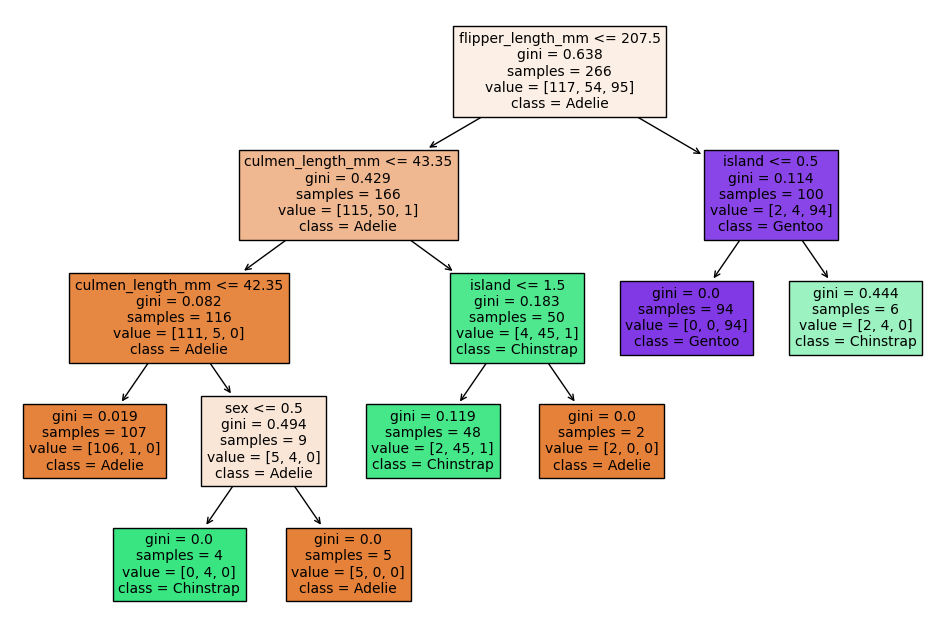

In [77]:
DT_model = DecisionTreeClassifier(max_leaf_nodes=7, random_state=101)
operations = [("OneHotEncoder", column_trans), ("DT_model", DT_model)]

pruned_tree_2 = Pipeline(steps=operations)
pruned_tree_2.fit(X_train,y_train)

report_model(pruned_tree_2)

# Max Leaf Nodes yaprakların bölünmesi sonucunda elde edebileceiğimiz max yaprak sayısını sınırlandırabiliyoruz.
# Bu parametre de overfitigi engellemek için kullanıyoruz. Ancak bu parametreyi özellikle çok büyük datalarda düzenleyebilmek
# çok zordur.

# Default değeri None'dır. Modelin ulaşabileceği Max yapraklanmaya izin verir.

## Criterion



Test Set
[[28  1  0]
 [ 0 14  0]
 [ 0  1 23]]


              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       0.88      1.00      0.93        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.97        67
   macro avg       0.96      0.97      0.96        67
weighted avg       0.97      0.97      0.97        67



Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  95]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        95

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



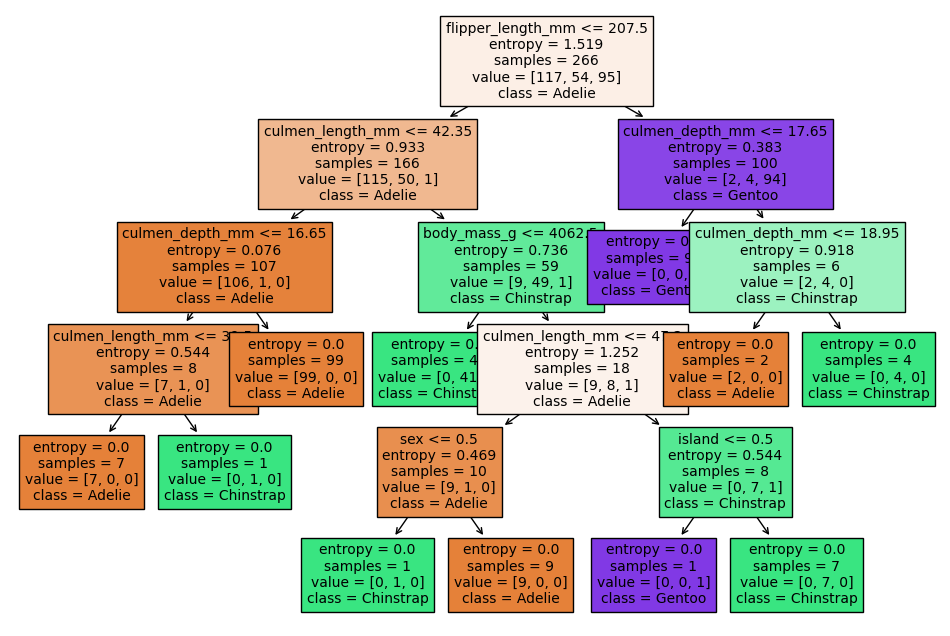

In [99]:
DT_model = DecisionTreeClassifier(criterion='entropy', random_state=101)
operations = [("OneHotEncoder", column_trans), ("DT_model", DT_model)]

entropy_tree = Pipeline(steps=operations)

entropy_tree.fit(X_train,y_train)

report_model(entropy_tree)

# Bölünme kriteri için gini veya entropy değrlerinden hangisini dikkate alması gerektiğini belirtiyoruz. 
# 2'sinide kullanabiliriz. Modele herhangi bir kısıtlama getirmezsek gini veya entropy değeri 0 olana kadar bölünmeye devam
# eder.
# entropy min 0 değeri alırken maximum log2(n) (n:class sayısı). Bizim datamız için max entropy değeri log2(3) = 1.585

# defaultu gini'dir.

In [79]:
np.log2(3)

1.584962500721156

## Splitter



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  95]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        95

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



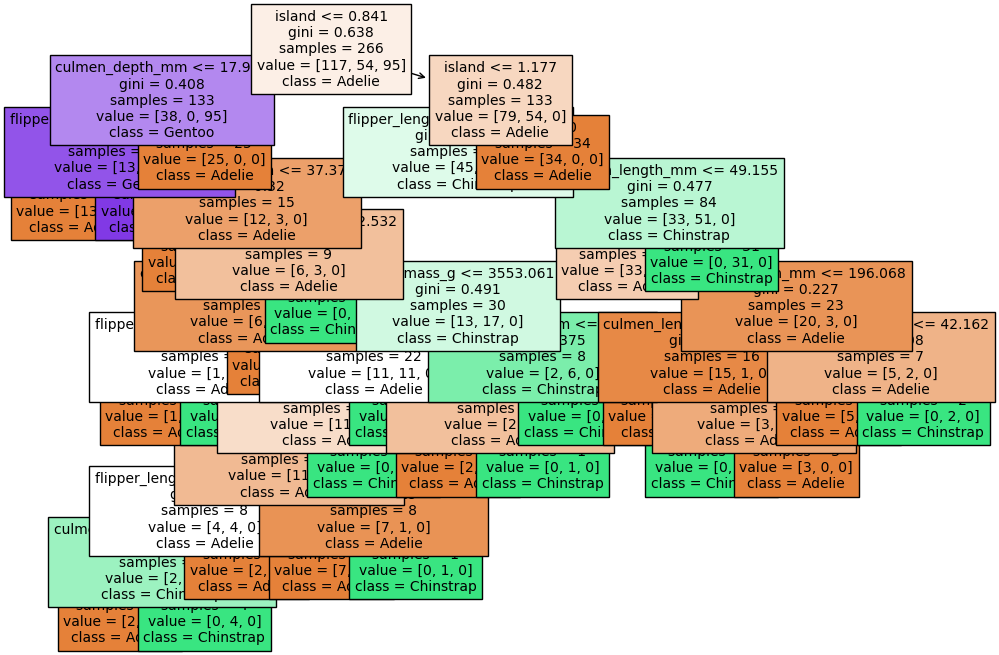

In [100]:
DT_model = DecisionTreeClassifier(splitter = "random")
operations = [("OneHotEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations)

tree.fit(X_train,y_train)

report_model(tree)

# splitter, modelin ilk dallanma dahil sonrasındaki tüm dallanmalarda kullanılacak featureların nasıl seçileceğine karar verir.
# splitter "best" veya "random" olabilir. 

# Eğer splitter "best" ise;
# 1. her dallanma için en iyi class ayrımını yapan feature kullanılır. "random" ise model tarafından rastgele seçilen herhangi
# bir featuran kullanılacağı anlamına gelir.

# 2. Tüm featurelara if/else sorusu sorduktan sonra en iyi class ayrımını bize veren feature best featuredır. Ve her aşamadaki
# bölünme işlemleri best featurelera göre yapılır.

# Her Bölünme işlemi için tüm featurelara if/else soruları tekrar sorulduğundan her bölünme işleminde aynı featurlar tekrar 
# tekrar kullanılabilir.

# Eğer splitter "random" seçersek model her bölünme aşamasında rastgele bir feature seçer ve o feature üzerinden en iyi 
# classlamayı elde etmeye çalışır.Ancak, Random çok fazla dallanmaya sebep olur.

# Bölünme işlemlerinde best featuren kullanılması modelin tüm featurelardan insight elde etmesine engel olduğundan DT modelinden
# elde ettiğimiz feature importancelar bize gerçekci sonuçlar vermeye bilir. Ancak splitter random kullanırsak model tüm 
# featurlardan insightlar elde ettiğinden feature importance daha güvenilir olur. Tree based modellerde en güvenilir
# feeature importance sonuçlarını random forest ve xgboost modellerinden elde ederiz.

# defaltu best'dir.


## Max_features



Test Set
[[24  4  1]
 [ 0 14  0]
 [ 0  0 24]]


              precision    recall  f1-score   support

      Adelie       1.00      0.83      0.91        29
   Chinstrap       0.78      1.00      0.88        14
      Gentoo       0.96      1.00      0.98        24

    accuracy                           0.93        67
   macro avg       0.91      0.94      0.92        67
weighted avg       0.94      0.93      0.93        67



Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  95]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        95

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



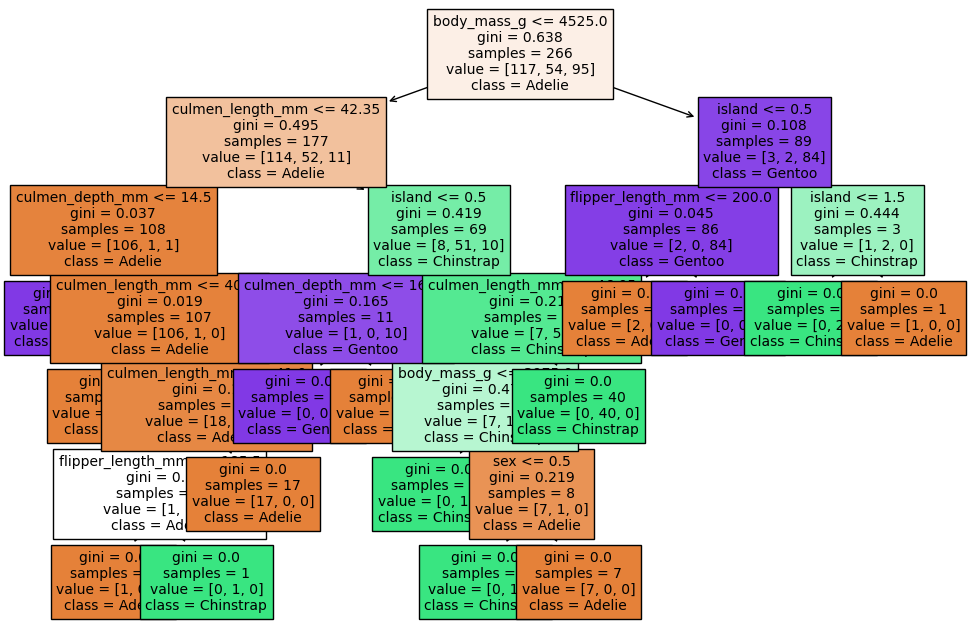

In [101]:
DT_model = DecisionTreeClassifier(max_features=3)
operations = [("OneHotEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations)

tree.fit(X_train,y_train)

report_model(tree)

# max_features modelin tüm featurlardan insight elde edebilmesi için yaprakların dallanmasına getirilen bir kısıtlamadır.
# max_features default değeri None'dır. Yani yaprak bölünmelerinde kullanılacak best featurı veya random featurı datamızda
# bulunan tüm featurlar içerisinden seç anlamına geliyor.

# Eğer max_feature ile bu seçime bir sınırlandırma getirirsek ne olur peki? Max_features =3 üzerinden konuşacak olursak;
# Eğer splitter="best" ise yaprakların bölünme aşamasında kullanılacak best feature datamızdaki tüm featurlar içerisinden değil
# modelin rastgele seçtiği 3 feature içerisinden best olan feature seçilerek bölünme bu feature üzerinden yapılır ve bu işlem
# her bölünme aşamasında tekrarlanır.

# Eğer splitter="random" ise yaprakların bölünme aşamasında kullanılacak random feature datamızdaki tüm featurlar içerisinden 
# değil modelin rastgele seçtiği 3 feature içerisinden rastgele bir feature seçilirek bölünme bu feature üzerinden yapılır ve
# bu işlem her bölünme aşamasında tekrarlanır

# Gördüğünüz gibi max_feature ile modelin bölünme işlemlerine bir rastsallık katıyoruz. Bu şekilde modelin datadaki tüm
# featurelardan insightlar elde ederek daha doğru bir feature importance elde etmeye çalışıyoruz.

# max_featuresin defaultu None'dır. Yani df'deki tüm featurları kullanır.

## Find Best Parameters

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
operations = [("OrdinalEncoder", column_trans), 
              ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

In [104]:
param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7],
              "DT_model__max_depth": [None, 2, 3, 4, 5],
              "DT_model__min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "DT_model__min_samples_split": [2, 3, 5, 6, 7,8,9]}

# en iyi hyper_parametreleri bulmaya çalışıyoruz.

In [105]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

# en iyi f1_micro skorunu döndürecek hyper_parametreleri bulmasını isityoruz.

In [106]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['island', 'sex'], dtype='object'))])),
                                       ('DT_model',
                                        DecisionTreeClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'DT_model__max_depth': [None, 2, 3, 4, 5],
                         'DT_model__max_features': [None, 'auto', 'log2', 2, 3,
                                                    4, 5, 6, 7],
                         'DT_model__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'DT_model__min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'DT_model__splitter': ['best', 'random']},
             return_train_score=True, scoring='f1_micro')

In [107]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.988889
mean_train_score    0.992901
Name: 12, dtype: object

In [108]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(min_samples_split=9,
                                        random_state=101))])

In [109]:
eval_metric(grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[30  1  0]
 [ 0 16  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.94      1.00      0.97        16
      Gentoo       1.00      1.00      1.00        20

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


Train_Set
[[114   1   0]
 [  1  51   0]
 [  0   0  99]]
              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       115
   Chinstrap       0.98      0.98      0.98        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           0.99       266
   macro avg       0.99      0.99      0.99       266
weighted avg       0.99      0.99      0.99       266



In [110]:
operations = [("OneHotEncoder", column_trans), 
              ("DT_model", DecisionTreeClassifier(min_samples_split=9,
                                                  random_state=101))]

scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"]
model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train2, 
                        y_train2,
                        scoring=scoring, 
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.988889
train_accuracy           0.992901
test_precision_micro     0.988889
train_precision_micro    0.992901
test_recall_micro        0.988889
train_recall_micro       0.992901
test_f1_micro            0.988889
train_f1_micro           0.992901
dtype: float64

## Final Model

In [111]:
X = df.drop(columns=["species", "flipper_length_mm"])
y = df['species']

In [112]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

operations = [("OrdinalEncoder", column_trans), 
              ("DT_model", DecisionTreeClassifier(min_samples_split=9,
                                                  random_state=101))]

pipe_final_model = Pipeline(steps=operations)

pipe_final_model.fit(X, y)

# bulduğumuz en iyi hyper parametreler ile tüm data için modeli yeniden kuruyoruz.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(min_samples_split=9,
                                        random_state=101))])

## Prediction

In [113]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
culmen_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


In [114]:
samples = {"island": ["Torgersen", "Biscoe"],
           "culmen_depth_mm":[18,14],
           "culmen_length_mm": [39, 48],
           'flipper_length_mm':[180, 214],
           "sex":["MALE","FEMALE"],
           'body_mass_g': [3700,4900]
           }

In [115]:
df_samples = pd.DataFrame(samples)
df_samples

# predict için verdiğim datanın hem featurı sıralaması farklı hem de 1 featura eksik.

,island,culmen_depth_mm,culmen_length_mm,flipper_length_mm,sex,body_mass_g
0,Torgersen,18,39,180,MALE,3700
1,Biscoe,14,48,214,FEMALE,4900


In [96]:
X.head()

# modele eğitim için verdiğim datada flipper_length_mm featurı olmamasına rağmen bu featurı içerisinde bulundurmayan yukardaki
# df_samples datasını prediction için modele versem bile model yine de bir prediction yapacaktır. 

# Çünkü make_column_transform fonksiyonu eğitim aşamasında orjinal datada gördüğü featurelar haricinde bir featurenin predict 
# aşamasında modele verildiğini tespit ederse bu feature ignore eder.

,island,culmen_length_mm,culmen_depth_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,3750.0,MALE
1,Torgersen,39.5,17.4,3800.0,FEMALE
2,Torgersen,40.3,18.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,3450.0,FEMALE
5,Torgersen,39.3,20.6,3650.0,MALE


In [97]:
pd.DataFrame(column_trans.transform(df_samples))

,0,1,2,3,4
0,2.0,1.0,39.0,18.0,3700.0
1,0.0,0.0,48.0,14.0,4900.0


In [98]:
pipe_final_model.predict(df_samples)

array(['Adelie', 'Gentoo'], dtype=object)